In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Standard Units

In [33]:
def standard_units(x):
    """Convert the array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [34]:
births = Table().read_table('baby.csv')

In [35]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [36]:
ages = births.column('Maternal Age')

In [37]:
ages_in_standard_units = standard_units(ages)

In [38]:
np.average(ages_in_standard_units), np.std(ages_in_standard_units)

(-7.868020072300939e-17, 1.0)

In [46]:
both = Table().with_columns(
    'Age in Years', ages, 
    'Age in Standard Units', ages_in_standard_units
)

In [47]:
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [26]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

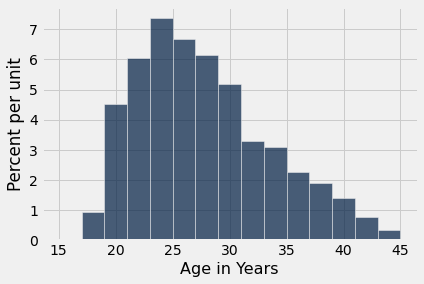

In [48]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

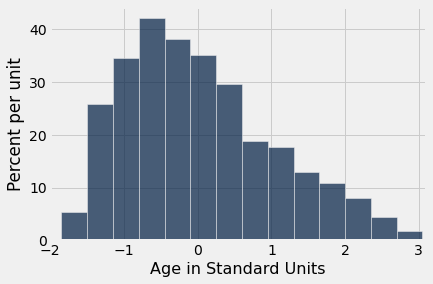

In [50]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);